In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import os


In [65]:
df = pd.read_csv("train.csv")
print(df.shape)
print(df.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

In [66]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [69]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=["count", '%']
missing.sort_values(by="count", ascending=False)

,count,%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [70]:
#Categorical Features
df.select_dtypes("object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


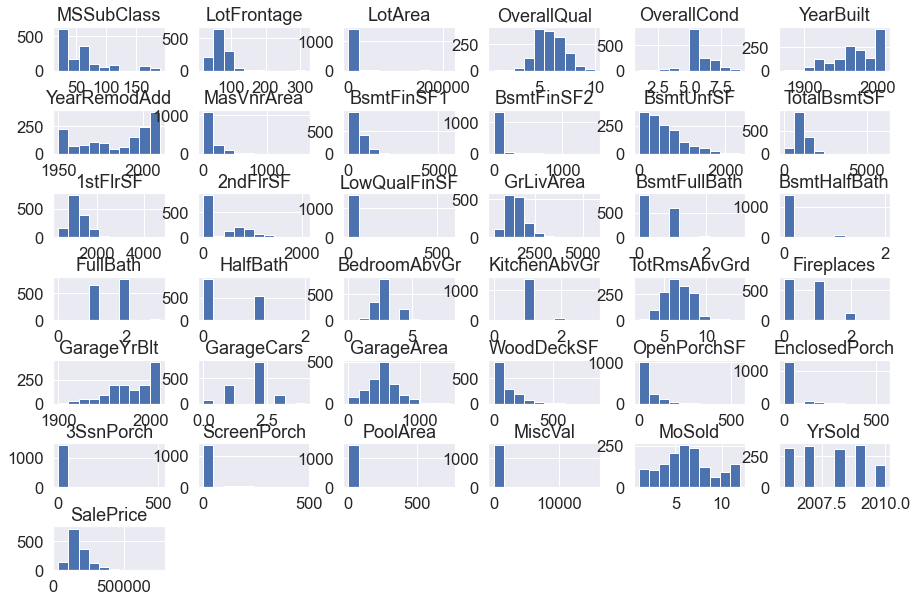

In [107]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.9);

In [72]:
train_ID = df['Id']
df.drop("Id", axis = 1, inplace = True)


In [73]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: x.unique())
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr],\
                        axis = 1, sort=False)
        print(str.head())
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
        
    str.columns = cols
 
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str



details = rstr(df, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))


Data shape: (1460, 80)
                   0     1     2    3          4  \
MSSubClass     int64  1460    15    0   0.000000   
MSZoning      object  1460     5    0   0.000000   
LotFrontage  float64  1201   111  259  17.739726   
LotArea        int64  1460  1073    0   0.000000   
Street        object  1460     2    0   0.000000   

                                                             5          6  \
MSSubClass   [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...   1.407657   
MSZoning                             [RL, RM, C (all), FV, RH]        NaN   
LotFrontage  [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...   2.163569   
LotArea      [8450, 9600, 11250, 9550, 14260, 14115, 10084,...  12.207688   
Street                                            [Pave, Grvl]        NaN   

                      7  SalePrice  
MSSubClass     1.580188  -0.084284  
MSZoning            NaN        NaN  
LotFrontage   17.452867   0.351799  
LotArea      203.243271   0.263843  
Street          

,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr SalePrice
SalePrice,int64,1460,663,0,0.000000,"[208500, 181500, 223500, 140000, 250000, 14300...",1.882876,6.536282,1.000000
OverallQual,int64,1460,10,0,0.000000,"[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]",0.216944,0.096293,0.790982
GrLivArea,int64,1460,861,0,0.000000,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...",1.366560,4.895121,0.708624
GarageCars,int64,1460,5,0,0.000000,"[2, 3, 1, 0, 4]",-0.342549,0.220998,0.640409
GarageArea,int64,1460,441,0,0.000000,"[548, 460, 608, 642, 836, 480, 636, 484, 468, ...",0.179981,0.917067,0.623431
...,...,...,...,...,...,...,...,...,...
PoolQC,object,7,4,1453,99.520548,"[nan, Ex, Fa, Gd]",NaN,NaN,NaN
Fence,object,281,5,1179,80.753425,"[nan, MnPrv, GdWo, GdPrv, MnWw]",NaN,NaN,NaN
MiscFeature,object,54,5,1406,96.301370,"[nan, Shed, Gar2, Othr, TenC]",NaN,NaN,NaN
SaleType,object,1460,9,0,0.000000,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...",NaN,NaN,NaN


In [74]:
rstr(df,pred=None)

Data shape: (1460, 80)
___________________________
Data types:
 object     43
int64      34
float64     3
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
MSSubClass,int64,1460,15,0,0.000000,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",1.407657,1.580188
MSZoning,object,1460,5,0,0.000000,"[RL, RM, C (all), FV, RH]",NaN,NaN
LotFrontage,float64,1201,111,259,17.739726,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",2.163569,17.452867
LotArea,int64,1460,1073,0,0.000000,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",12.207688,203.243271
Street,object,1460,2,0,0.000000,"[Pave, Grvl]",NaN,NaN
...,...,...,...,...,...,...,...,...
MoSold,int64,1460,12,0,0.000000,"[2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]",0.212053,-0.404109
YrSold,int64,1460,5,0,0.000000,"[2008, 2007, 2006, 2009, 2010]",0.096269,-1.190601
SaleType,object,1460,9,0,0.000000,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...",NaN,NaN
SaleCondition,object,1460,6,0,0.000000,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa...",NaN,NaN


In [75]:
 distincts = df.apply(lambda x: x.unique().shape[0])

In [76]:
 distincts = df.apply(lambda x: x.nunique())

In [77]:
distincts

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

In [78]:
df["MSSubClass"].nunique()

15

In [79]:
counts = df.apply(lambda x: x.count())

In [80]:
counts

MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 80, dtype: int64

In [81]:
uniques = df.apply(lambda x: x.unique())

In [82]:
uniques

MSSubClass       [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...
MSZoning                                 [RL, RM, C (all), FV, RH]
LotFrontage      [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...
LotArea          [8450, 9600, 11250, 9550, 14260, 14115, 10084,...
Street                                                [Pave, Grvl]
                                       ...                        
MoSold                     [2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]
YrSold                              [2008, 2007, 2006, 2009, 2010]
SaleType         [WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...
SaleCondition    [Normal, Abnorml, Partial, AdjLand, Alloca, Fa...
SalePrice        [208500, 181500, 223500, 140000, 250000, 14300...
Length: 80, dtype: object

In [83]:
corr = df.corr()["SalePrice"]

In [84]:
corr


MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


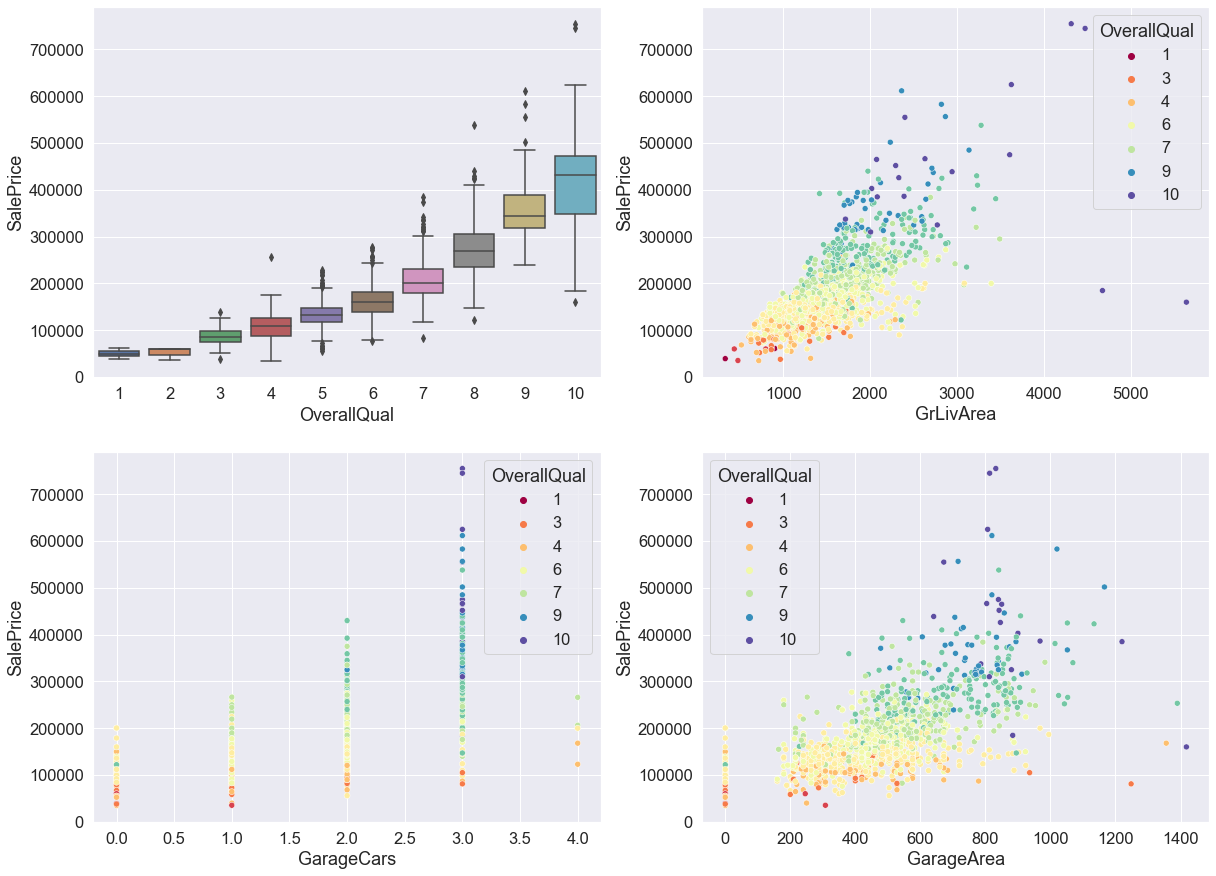

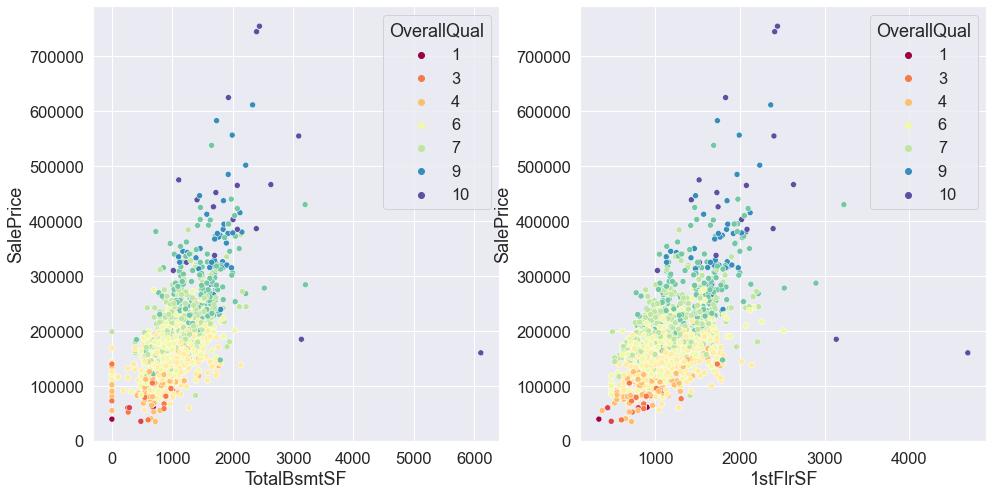

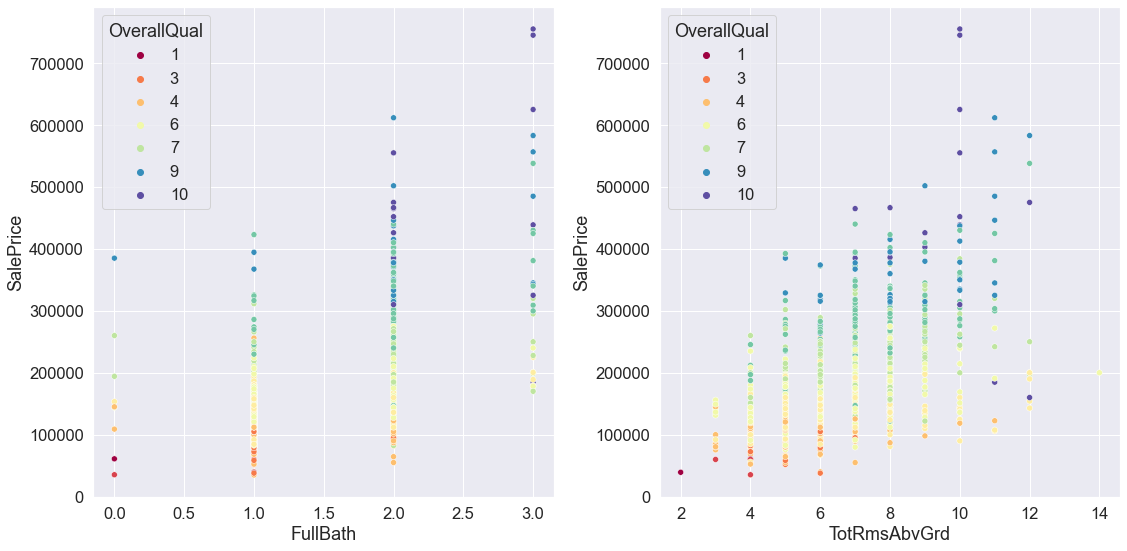

In [102]:
train = df
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])
#fig1 = fig.add_subplot(221); sns.scatterplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = train.GarageCars, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = train.SalePrice , x = train.TotalBsmtSF, hue=train.OverallQual, palette= 'Spectral')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = train.SalePrice, x = train['1stFlrSF'], hue=train.OverallQual, palette= 'Spectral')

fig8 = plt.figure(figsize=(16, 8))
fig9 = fig8.add_subplot(121);
sns.scatterplot(y = train.SalePrice, x = train['FullBath'], hue=train.OverallQual, palette= 'Spectral')

fig10 = fig8.add_subplot(122); 
sns.scatterplot(y = train.SalePrice, x = train['TotRmsAbvGrd'], hue=train.OverallQual, palette= 'Spectral')



plt.tight_layout(); plt.show()


<Figure size 1080x720 with 0 Axes>

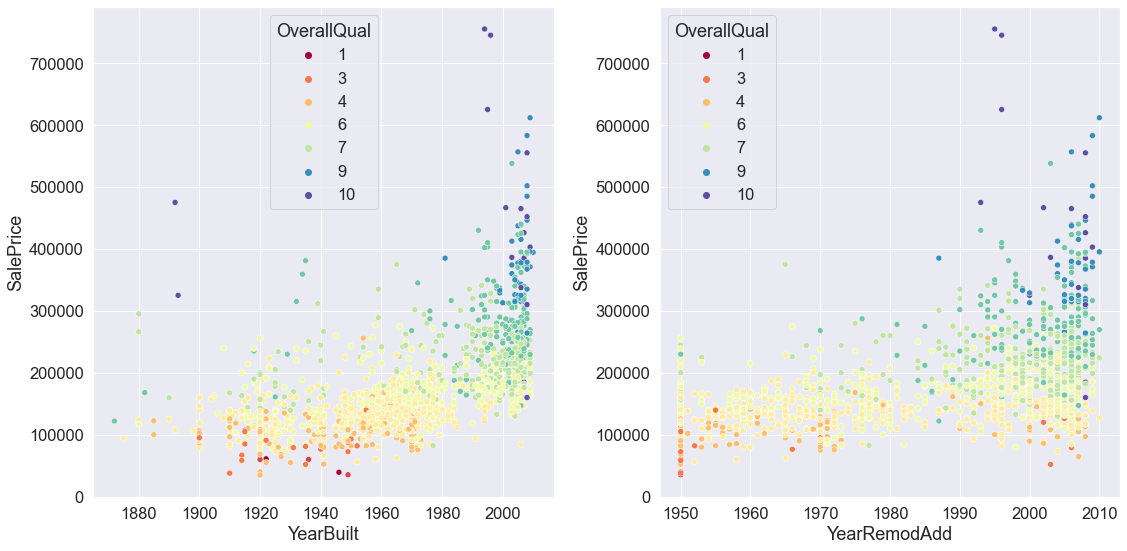

In [106]:
fig = plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
fig11 = plt.figure(figsize=(16, 8))
fig12 = fig11.add_subplot(121);
sns.scatterplot(y = train.SalePrice, x = train['YearBuilt'], hue=train.OverallQual, palette= 'Spectral')

fig13 = fig11.add_subplot(122); 
sns.scatterplot(y = train.SalePrice, x = train['YearRemodAdd'], hue=train.OverallQual, palette= 'Spectral')

plt.tight_layout(); plt.show()

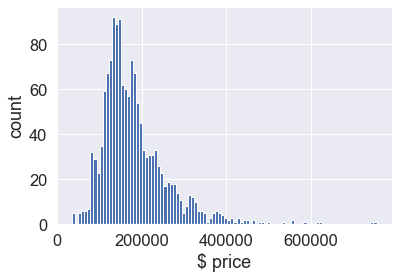

In [110]:
df.SalePrice.hist(bins=100)
plt.xlabel('$ price')
plt.ylabel('count');